In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import turtle
import urllib.request
import time
import webbrowser
import geocoder
import csv

In [ ]:
import requests
import json
import csv

url = "https://services.arcgis.com/xOi1kZaI0eWDREZv/arcgis/rest/services/NTAD_Intermodal_Passenger_Connectivity_Database/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

response = requests.get(url)
data = response.json()

features = data.get("features", [])

if features:
    field_names = list(features[0]["properties"].keys())
else:
    field_names = []

csv_filename = "mile2.csv"
with open(csv_filename, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=field_names)
    writer.writeheader()
    for feature in features:
        writer.writerow(feature["properties"])

In [ ]:
df1=pd.read_csv("mile2.csv")
df1.head()

,OBJECTID,X,Y,FAC_ID,POINT_ID,NEAR_ID_1,NEAR_ID_2,NEAR_ID_3,AIR_CODE,AIR_CODE2,...,I_SERVICE,T_SERVICE,CBSA_CODE,CBSA_TYPE,MODES_SERV,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE
0,1,-149.99636,61.17436,AK9950104,1,NaN,NaN,NaN,ANC,NaN,...,1,1,11260.0,1,3,1,1,1,0,0
1,2,-149.97998,61.17454,AK9951901,1,NaN,NaN,NaN,NaN,NaN,...,1,1,11260.0,1,3,1,1,1,0,0
2,3,-149.98000,61.17450,AK9951902,1,NaN,NaN,NaN,NaN,NaN,...,1,1,11260.0,1,3,1,1,1,0,0
3,4,-165.78531,54.13247,AK9955301,2,NaN,NaN,NaN,KQA,NaN,...,1,0,NaN,0,2,0,1,0,1,0
4,5,-165.80770,54.15120,AK9955302,2,NaN,NaN,NaN,NaN,NaN,...,1,0,NaN,0,2,0,1,0,1,0


In [ ]:
print(df1.isnull().sum())

OBJECTID          0
X                 0
Y                 0
FAC_ID            0
POINT_ID          0
NEAR_ID_1      1815
NEAR_ID_2      1978
NEAR_ID_3      2000
AIR_CODE       1677
AIR_CODE2      1934
AMTRAKCODE     1603
FERRY_CODE     1918
RAIL_ID        1451
BIKE_ID        1849
DATE_UPDTE        0
ADDRESS         286
CITY              0
STATE             0
ZIPCODE           0
METRO_AREA      300
FAC_NAME         43
LONGITUDE         0
LATITUDE          0
POINT_LON         0
POINT_LAT         0
FAC_TYPE          0
FERRY_T           0
FERRY_I           0
BUS_T             0
BUS_I             0
BUS_CODE_S        0
BUS_SUPP          0
RAIL_I            0
RAIL_C            0
RAIL_H            0
RAIL_LIGHT        0
AIR_SERVE         0
BIKE_SHARE        0
BIKE_SYS_ID       0
BIKE_SYS       1845
WEBSITE        1237
NOTES           158
SOURCE          178
I_SERVICE         0
T_SERVICE         0
CBSA_CODE       300
CBSA_TYPE         0
MODES_SERV        0
MODE_BUS          0
MODE_AIR          0


In [ ]:
columns_to_drop = ['NEAR_ID_3', 'AIR_CODE2', 'NEAR_ID_2', 'FERRY_CODE', 'AIR_CODE', 'AMTRAKCODE', 'NEAR_ID_1', 'RAIL_ID', 'BIKE_ID', 'WEBSITE', 'SOURCE', 'NOTES', 'CBSA_CODE', 'CBSA_TYPE']
df_cleaned = df1.drop(columns=columns_to_drop)
print(df_cleaned.isnull().sum())

OBJECTID          0
X                 0
Y                 0
FAC_ID            0
POINT_ID          0
DATE_UPDTE        0
ADDRESS         286
CITY              0
STATE             0
ZIPCODE           0
METRO_AREA      300
FAC_NAME         43
LONGITUDE         0
LATITUDE          0
POINT_LON         0
POINT_LAT         0
FAC_TYPE          0
FERRY_T           0
FERRY_I           0
BUS_T             0
BUS_I             0
BUS_CODE_S        0
BUS_SUPP          0
RAIL_I            0
RAIL_C            0
RAIL_H            0
RAIL_LIGHT        0
AIR_SERVE         0
BIKE_SHARE        0
BIKE_SYS_ID       0
BIKE_SYS       1845
I_SERVICE         0
T_SERVICE         0
MODES_SERV        0
MODE_BUS          0
MODE_AIR          0
MODE_RAIL         0
MODE_FERRY        0
MODE_BIKE         0
dtype: int64


In [ ]:
categorical_cols = ["BIKE_SYS", "ADDRESS", "FAC_NAME", "METRO_AREA"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")
print(df_cleaned.isnull().sum())

OBJECTID       0
X              0
Y              0
FAC_ID         0
POINT_ID       0
DATE_UPDTE     0
ADDRESS        0
CITY           0
STATE          0
ZIPCODE        0
METRO_AREA     0
FAC_NAME       0
LONGITUDE      0
LATITUDE       0
POINT_LON      0
POINT_LAT      0
FAC_TYPE       0
FERRY_T        0
FERRY_I        0
BUS_T          0
BUS_I          0
BUS_CODE_S     0
BUS_SUPP       0
RAIL_I         0
RAIL_C         0
RAIL_H         0
RAIL_LIGHT     0
AIR_SERVE      0
BIKE_SHARE     0
BIKE_SYS_ID    0
BIKE_SYS       0
I_SERVICE      0
T_SERVICE      0
MODES_SERV     0
MODE_BUS       0
MODE_AIR       0
MODE_RAIL      0
MODE_FERRY     0
MODE_BIKE      0
dtype: int64


In [ ]:
grouped_by_city = df1.groupby("CITY").agg({
    "FAC_ID": "count",  # Total number of facilities
    "FAC_TYPE": "nunique",  # Number of unique facility types
    "MODE_BUS": "sum",  # Total facilities with bus service
    "MODE_AIR": "sum",  # Total facilities with air service
    "MODE_RAIL": "sum",  # Total facilities with rail service
    "MODE_FERRY": "sum",  # Total facilities with ferry service
    "MODE_BIKE": "sum",  # Total facilities with bike service
    "BIKE_SHARE": "sum"  # Total facilities with bike share
}).reset_index()

pd.DataFrame(grouped_by_city.rename(columns={"FAC_ID": "Total_Facilities"}, inplace=True))

grouped_by_city

,CITY,Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
0,Aberdeen,2,2,2,0,2,0,0,6
1,Acton,1,1,1,0,1,0,0,0
2,Adak Island,1,1,0,1,0,0,0,3
3,Akhihok,1,1,0,1,0,0,0,3
4,Akiachak,1,1,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...
733,Wrangell,2,2,0,1,0,1,0,6
734,Yakutat,2,2,0,1,0,1,0,6
735,Yonkers,2,2,2,0,2,0,0,0
736,Yuma,3,3,3,1,2,0,0,9


In [ ]:
grouped_by_city.sort_values("Total_Facilities", ascending=False)
grouped_by_city.loc[grouped_by_city['CITY'] == 'Denver']

,CITY,Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
160,Denver,2,2,2,0,2,0,0,6


In [ ]:
grouped_by_state = df1.groupby("STATE").agg({
    "FAC_ID": "count",  # Total number of facilities
    "FAC_TYPE": "nunique",  # Number of unique facility types
    "MODE_BUS": "sum",  # Total facilities with bus service
    "MODE_AIR": "sum",  # Total facilities with air service
    "MODE_RAIL": "sum",  # Total facilities with rail service
    "MODE_FERRY": "sum",  # Total facilities with ferry service
    "MODE_BIKE": "sum",  # Total facilities with bike service
    "BIKE_SHARE": "sum"  # Total facilities with bike share
}).reset_index()

pd.DataFrame(grouped_by_state.rename(columns={"FAC_ID": "Total_Facilities"}, inplace=True))

grouped_by_state.sort_values("Total_Facilities", ascending=False)

,STATE,Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
4,CA,787,9,668,31,655,29,180,943
0,AK,302,5,30,233,26,43,0,906
31,NY,100,8,89,10,90,14,40,82
3,AZ,80,4,69,12,41,0,0,222
17,MA,75,9,70,4,68,7,41,84
35,PA,71,7,69,7,69,0,27,57
12,IL,68,7,61,7,66,7,26,66
28,NJ,47,8,41,4,47,16,14,29
2,AR,44,4,29,8,19,0,0,132
42,WA,40,7,39,8,31,10,0,120


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.eia.gov/state/rankings/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find('table')
print(tables)


<table class="L2_toggle_table" width="100%">
<tr>
<td width="14%">
<a href="?sid=US">United States</a><br>
<a href="?sid=AL">
						Alabama					</a><br>
<a href="?sid=AK">
						Alaska					</a><br/>
<a href="?sid=AZ">
						Arizona					</a><br/>
<a href="?sid=AR">
						Arkansas					</a><br/>
<a href="?sid=CA">
						California					</a><br/>
<a href="?sid=CO">
						Colorado					</a><br/>
<a href="?sid=CT">
						Connecticut					</a><br/>
<a href="?sid=DE">
						Delaware					</a><br/>
</br></br></td>
<td width="14%">
<a href="?sid=DC">
						District of Columbia					</a><br/>
<a href="?sid=FL">
						Florida					</a><br/>
<a href="?sid=GA">
						Georgia					</a><br/>
<a href="?sid=HI">
						Hawaii					</a><br/>
<a href="?sid=ID">
						Idaho					</a><br/>
<a href="?sid=IL">
						Illinois					</a><br/>
<a href="?sid=IN">
						Indiana					</a><br/>
<a href="?sid=IA">
						Iowa					</a><br/>
<a href="?sid=KS">
						Kansas					</a><br/>
</td>
<td width="14%">
<a href="?sid=KY">
				

In [ ]:
table = soup.find('table', {'class': 'L2_toggle_table'})
print(table)

<table class="L2_toggle_table" width="100%">
<tr>
<td width="14%">
<a href="?sid=US">United States</a><br>
<a href="?sid=AL">
						Alabama					</a><br>
<a href="?sid=AK">
						Alaska					</a><br/>
<a href="?sid=AZ">
						Arizona					</a><br/>
<a href="?sid=AR">
						Arkansas					</a><br/>
<a href="?sid=CA">
						California					</a><br/>
<a href="?sid=CO">
						Colorado					</a><br/>
<a href="?sid=CT">
						Connecticut					</a><br/>
<a href="?sid=DE">
						Delaware					</a><br/>
</br></br></td>
<td width="14%">
<a href="?sid=DC">
						District of Columbia					</a><br/>
<a href="?sid=FL">
						Florida					</a><br/>
<a href="?sid=GA">
						Georgia					</a><br/>
<a href="?sid=HI">
						Hawaii					</a><br/>
<a href="?sid=ID">
						Idaho					</a><br/>
<a href="?sid=IL">
						Illinois					</a><br/>
<a href="?sid=IN">
						Indiana					</a><br/>
<a href="?sid=IA">
						Iowa					</a><br/>
<a href="?sid=KS">
						Kansas					</a><br/>
</td>
<td width="14%">
<a href="?sid=KY">
				

In [ ]:
import requests

url = 'https://www.eia.gov/state/'
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
html_content

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\r\n<head>\r\n<meta name="agency" content="EIA" />\r\n<meta name="audience" content="general" />\r\n<meta name="subject" content="Energy Data and Statistics, Information, and Maps" />\r\n<meta name="Description" content="Petroleum prices, supply and demand information from the Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" />\r\n<meta name="Keywords" content="crude oil, spot prices, retail gasoline prices, diesel fuel prices, weekly supply estimates,\r\ncrude oil inventories, stocks" />\r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta http-equiv="Content-Language" content="en-us" />\r\n<meta name="robots" content="all" />\r\n<meta name="agency" content="E

In [ ]:
import pandas as pd

tables = pd.read_html(html_content)
for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.head())  # Display the first few rows of each table
tables

Table 0:
                                                   0  \
0  United States  Alabama Alaska Arizona Arkansas...   

                                                   1  \
0  District of Columbia Florida Georgia Hawaii Id...   

                                                   2  \
0  Kentucky Louisiana Maine Maryland Massachusett...   

                                                   3  \
0  Montana Nebraska Nevada New Hampshire New Jers...   

                                                   4  \
0  Ohio Oklahoma Oregon Pennsylvania Rhode Island...   

                                                   5  \
0  Utah Vermont Virginia Washington West Virginia...   

                                                   6  
0  U.S. Territories  American Samoa Guam Northern...  


<ipython-input-68-f987252c5f1d>:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_content)


[                                                   0  \
 0  United States  Alabama Alaska Arizona Arkansas...   
 
                                                    1  \
 0  District of Columbia Florida Georgia Hawaii Id...   
 
                                                    2  \
 0  Kentucky Louisiana Maine Maryland Massachusett...   
 
                                                    3  \
 0  Montana Nebraska Nevada New Hampshire New Jers...   
 
                                                    4  \
 0  Ohio Oklahoma Oregon Pennsylvania Rhode Island...   
 
                                                    5  \
 0  Utah Vermont Virginia Washington West Virginia...   
 
                                                    6  
 0  U.S. Territories  American Samoa Guam Northern...  ]

In [ ]:
gas_df = pd.read_csv('SelectedStateRankingsData.csv')
gas_df.head()

,State,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Federal offshore production is not included in the Production Shares.
0,AK,1.4,13,987,1,13051,1,NaN
1,WY,6.1,4,853,4,11221,2,NaN
2,ND,4.2,8,861,3,10507,3,NaN
3,LA,4.9,6,925,2,9781,4,NaN
4,IA,0.8,19,445,7,6927,5,NaN


In [ ]:
gas_df.rename(columns={"State": "STATE"}, inplace=True)
merged_df = pd.merge(gas_df, grouped_by_state, on='STATE', how='inner')
merged_df.drop(columns=['Federal offshore production is not included in the Production Shares.'], inplace=True)

merged_df.head()

,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906
1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0
2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3
3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21
4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15


In [ ]:
merged_df.describe()

,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
count,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2.03913,24.847826,333.456522,26.326087,5664.717391,27.043478,43.478261,4.347826,33.260870,8.826087,31.282609,2.913043,8.478261,72.347826
std,4.16261,14.896633,195.553881,14.829482,1897.424801,14.911527,121.921785,2.141831,98.174999,34.163856,96.400015,8.129032,27.708594,188.389811
min,0.00000,1.000000,171.000000,1.000000,3837.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.22500,12.250000,210.750000,14.250000,4612.500000,15.250000,4.000000,3.000000,4.000000,1.000000,3.000000,0.000000,0.000000,6.000000
50%,0.60000,24.500000,280.500000,26.500000,5103.000000,26.500000,10.500000,4.000000,10.000000,2.000000,8.500000,0.000000,0.000000,20.500000
75%,1.55000,37.500000,366.250000,38.750000,6002.250000,39.750000,36.000000,6.000000,29.750000,5.750000,25.500000,0.000000,4.500000,52.500000
max,25.50000,51.000000,987.000000,51.000000,13051.000000,51.000000,787.000000,9.000000,668.000000,233.000000,655.000000,43.000000,180.000000,943.000000


In [ ]:
df11=grouped_by_state.sort_values("Total_Facilities", ascending=False)
df11.head()

,STATE,Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
4,CA,787,9,668,31,655,29,180,943
0,AK,302,5,30,233,26,43,0,906
31,NY,100,8,89,10,90,14,40,82
3,AZ,80,4,69,12,41,0,0,222
17,MA,75,9,70,4,68,7,41,84


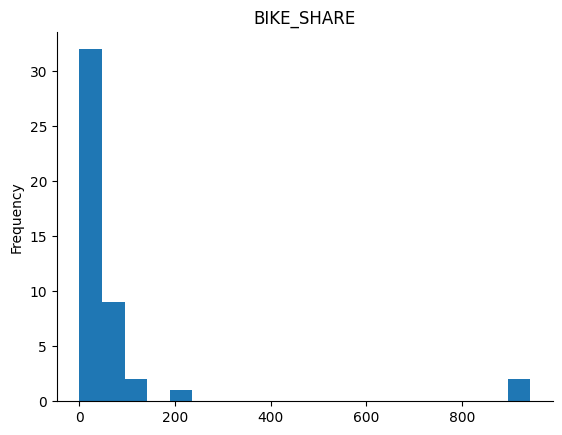

In [ ]:
# @title FAC_TYPE

from matplotlib import pyplot as plt
df11['BIKE_SHARE'].plot(kind='hist', bins=20, title='BIKE_SHARE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_df.head()

,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906
1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0
2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3
3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21
4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15


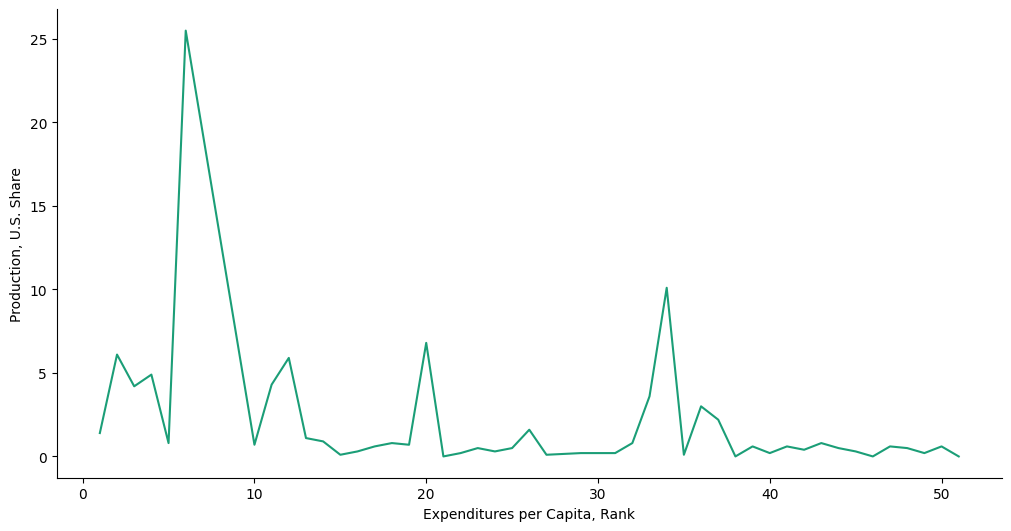

In [ ]:
# @title Expenditures per Capita, Rank vs Production, U.S. Share

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Expenditures per Capita, Rank']
  ys = series['Production, U.S. Share']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('Expenditures per Capita, Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Expenditures per Capita, Rank')
_ = plt.ylabel('Production, U.S. Share')

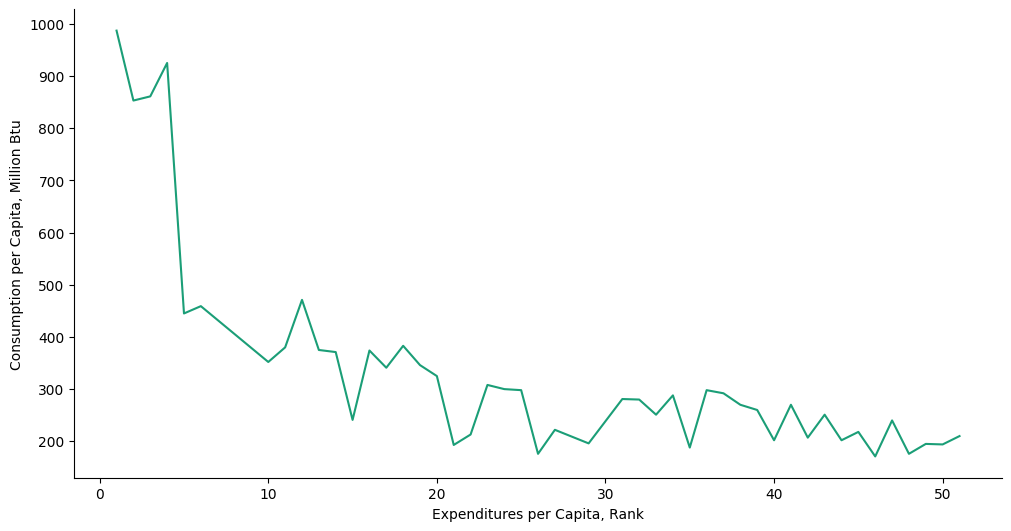

In [ ]:
# @title Expenditures per Capita, Rank vs Consumption per Capita, Million Btu

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Expenditures per Capita, Rank']
  ys = series['Consumption per Capita, Million Btu']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('Expenditures per Capita, Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Expenditures per Capita, Rank')
_ = plt.ylabel('Consumption per Capita, Million Btu')

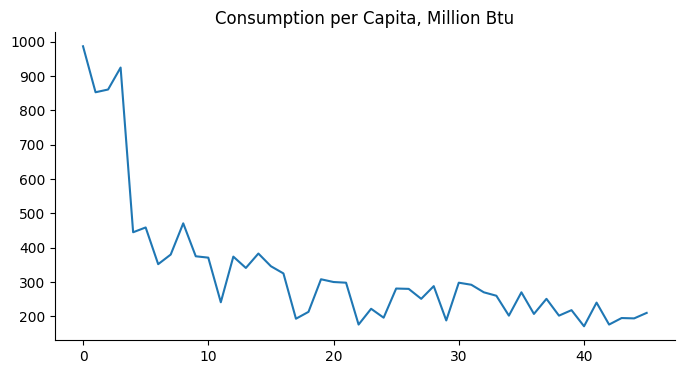

In [ ]:
# @title Consumption per Capita, Million Btu

from matplotlib import pyplot as plt
merged_df['Consumption per Capita, Million Btu'].plot(kind='line', figsize=(8, 4), title='Consumption per Capita, Million Btu')
plt.gca().spines[['top', 'right']].set_visible(False)

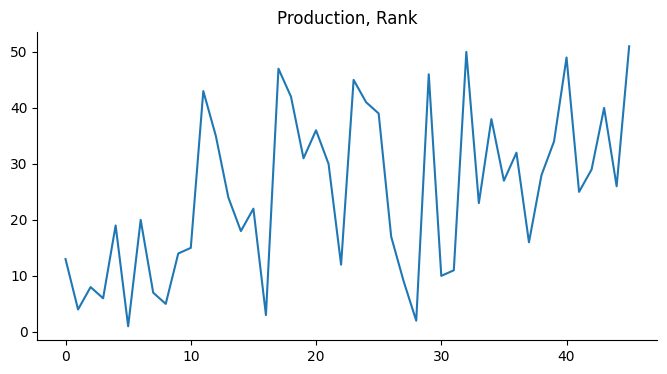

In [ ]:
# @title Production, Rank

from matplotlib import pyplot as plt
merged_df['Production, Rank'].plot(kind='line', figsize=(8, 4), title='Production, Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

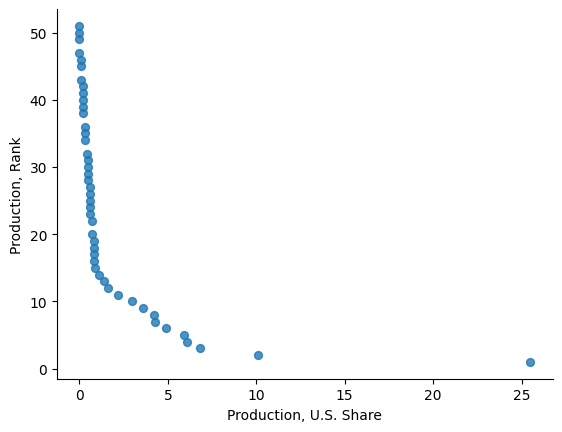

In [ ]:
# @title Production, U.S. Share vs Production, Rank

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='Production, U.S. Share', y='Production, Rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

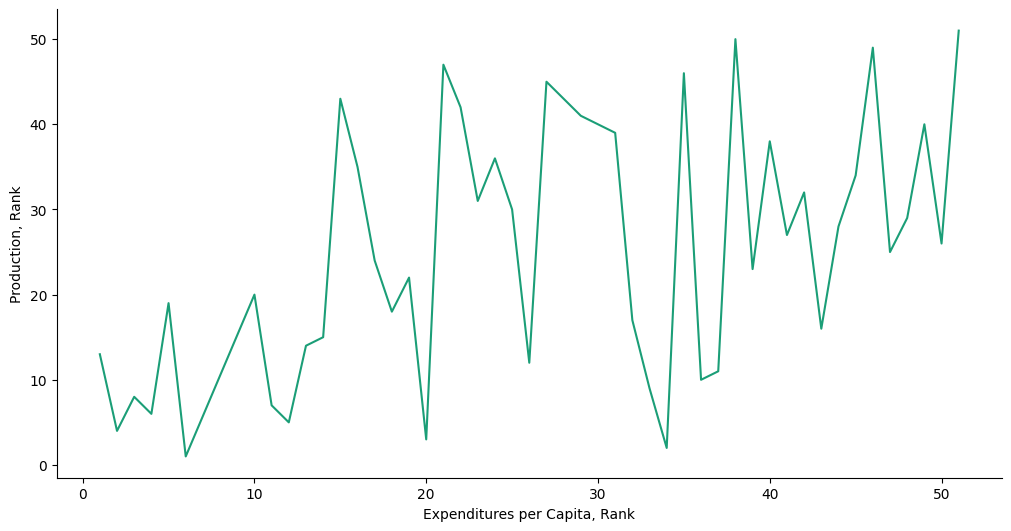

In [ ]:
# @title Expenditures per Capita, Rank vs Production, Rank

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Expenditures per Capita, Rank']
  ys = series['Production, Rank']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('Expenditures per Capita, Rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Expenditures per Capita, Rank')
_ = plt.ylabel('Production, Rank')

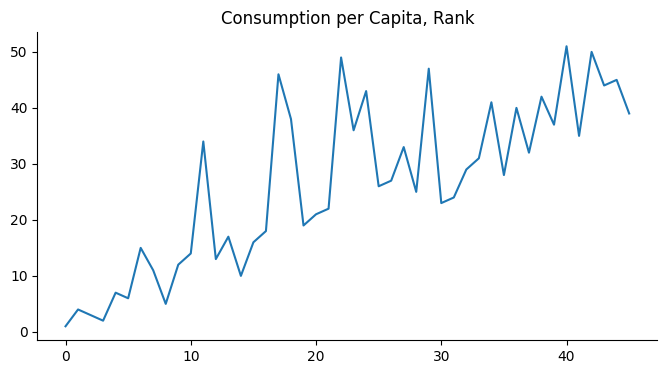

In [ ]:
# @title Consumption per Capita, Rank

from matplotlib import pyplot as plt
merged_df['Consumption per Capita, Rank'].plot(kind='line', figsize=(8, 4), title='Consumption per Capita, Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

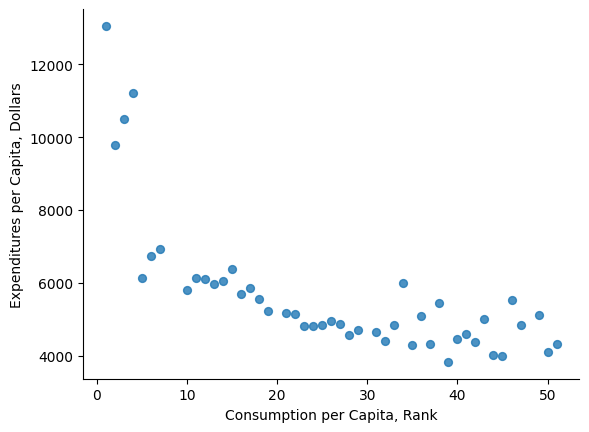

In [ ]:
# @title Consumption per Capita, Rank vs Expenditures per Capita, Dollars

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='Consumption per Capita, Rank', y='Expenditures per Capita, Dollars', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

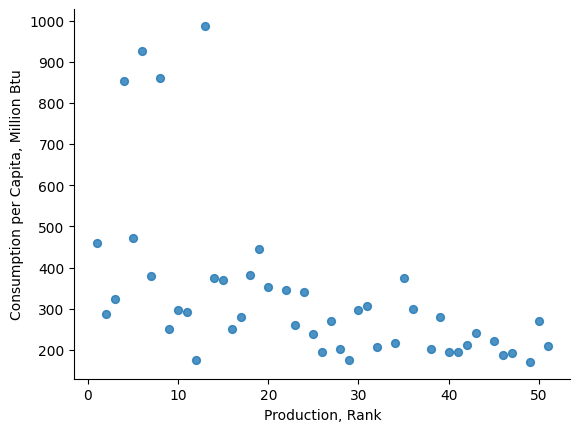

In [ ]:
# @title Production, Rank vs Consumption per Capita, Million Btu

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='Production, Rank', y='Consumption per Capita, Million Btu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

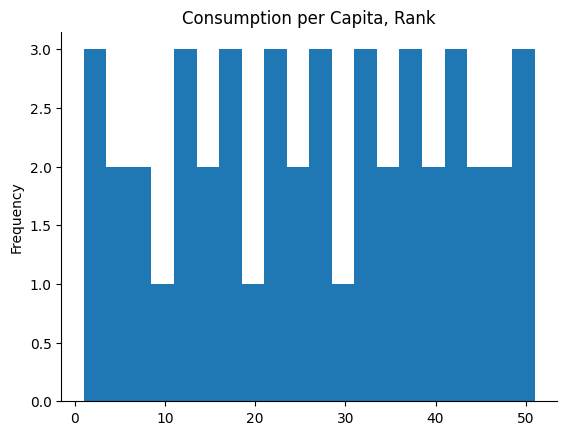

In [ ]:
# @title Consumption per Capita, Rank

from matplotlib import pyplot as plt
merged_df['Consumption per Capita, Rank'].plot(kind='hist', bins=20, title='Consumption per Capita, Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

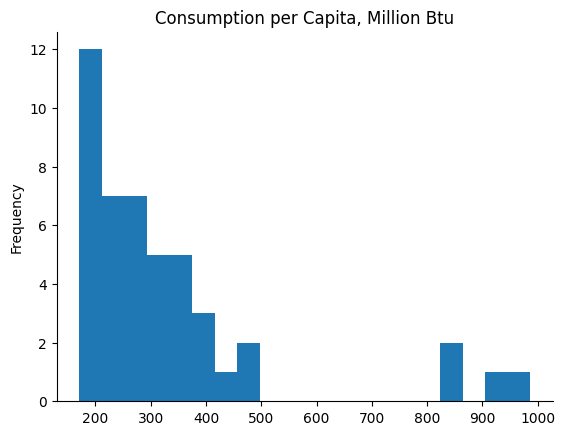

In [ ]:
# @title Consumption per Capita, Million Btu

from matplotlib import pyplot as plt
merged_df['Consumption per Capita, Million Btu'].plot(kind='hist', bins=20, title='Consumption per Capita, Million Btu')
plt.gca().spines[['top', 'right',]].set_visible(False)

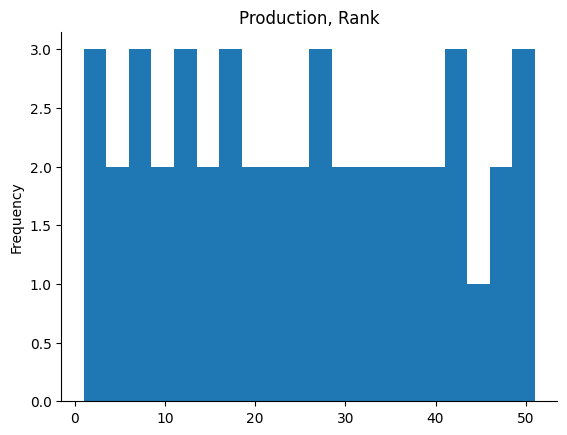

In [ ]:
# @title Production, Rank

from matplotlib import pyplot as plt
merged_df['Production, Rank'].plot(kind='hist', bins=20, title='Production, Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

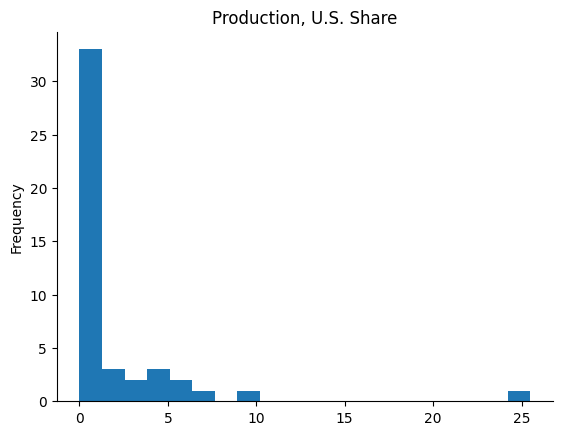

In [ ]:

from matplotlib import pyplot as plt
merged_df['Production, U.S. Share'].plot(kind='hist', bins=20, title='Production, U.S. Share')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import requests
import pandas as pd

API_KEY = "wULUfwS3znEy2XmIoHi4aRUbktsUslZaVXOVpRrr"

SERIES_ID = "TOTAL.CO2-TOT-US.A"
url = f"https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?api_key={API_KEY}&start=2022&end=2022&length=5000"

response = requests.get(url)
data = response.json()


print(data)

{'response': {'total': '1248', 'dateFormat': 'YYYY', 'frequency': 'annual', 'data': [{'period': '2022', 'sectorId': 'CC', 'sector-name': 'Commercial carbon dioxide emissions', 'fuelId': 'PE', 'fuel-name': 'Petroleum', 'stateId': 'AK', 'state-name': 'Alaska'}, {'period': '2022', 'sectorId': 'CC', 'sector-name': 'Commercial carbon dioxide emissions', 'fuelId': 'CO', 'fuel-name': 'Coal', 'stateId': 'AK', 'state-name': 'Alaska'}, {'period': '2022', 'sectorId': 'CC', 'sector-name': 'Commercial carbon dioxide emissions', 'fuelId': 'NG', 'fuel-name': 'Natural Gas', 'stateId': 'AK', 'state-name': 'Alaska'}, {'period': '2022', 'sectorId': 'CC', 'sector-name': 'Commercial carbon dioxide emissions', 'fuelId': 'TO', 'fuel-name': 'All Fuels', 'stateId': 'AK', 'state-name': 'Alaska'}, {'period': '2022', 'sectorId': 'EC', 'sector-name': 'Electric Power carbon dioxide emissions', 'fuelId': 'PE', 'fuel-name': 'Petroleum', 'stateId': 'AK', 'state-name': 'Alaska'}, {'period': '2022', 'sectorId': 'EC', 's

In [ ]:
data = response.json()
if "response" in data and "data" in data["response"]:
        emissions_data = data["response"]["data"]

        df = pd.DataFrame(emissions_data)

        df.to_csv("co2_emissions.csv", index=False)
        print("CSV file saved successfully as 'co2_emissions.csv'")


CSV file saved successfully as 'co2_emissions.csv'


In [ ]:
newdf = pd.read_csv('co2_emissions.csv')
newdf.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name
0,2022,CC,Commercial carbon dioxide emissions,PE,Petroleum,AK,Alaska
1,2022,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska
2,2022,CC,Commercial carbon dioxide emissions,NG,Natural Gas,AK,Alaska
3,2022,CC,Commercial carbon dioxide emissions,TO,All Fuels,AK,Alaska
4,2022,EC,Electric Power carbon dioxide emissions,PE,Petroleum,AK,Alaska


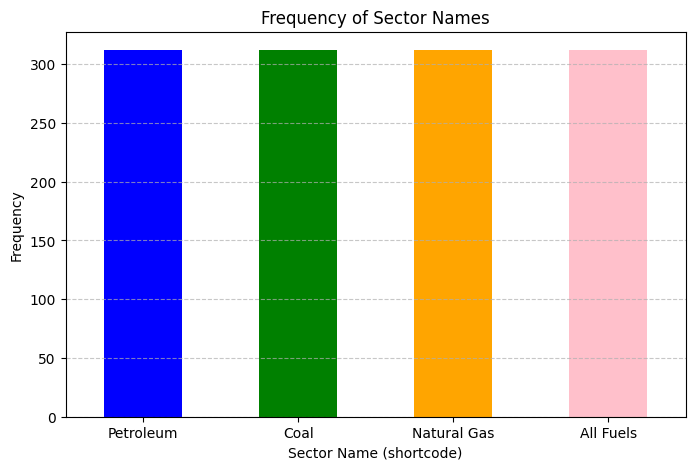

In [ ]:
category_counts = newdf['fuel-name'].value_counts()


# Plot the frequency
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'pink', 'red', 'purple'])
plt.xlabel('Sector Name (shortcode)')
plt.ylabel('Frequency')
plt.title('Frequency of Sector Names')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

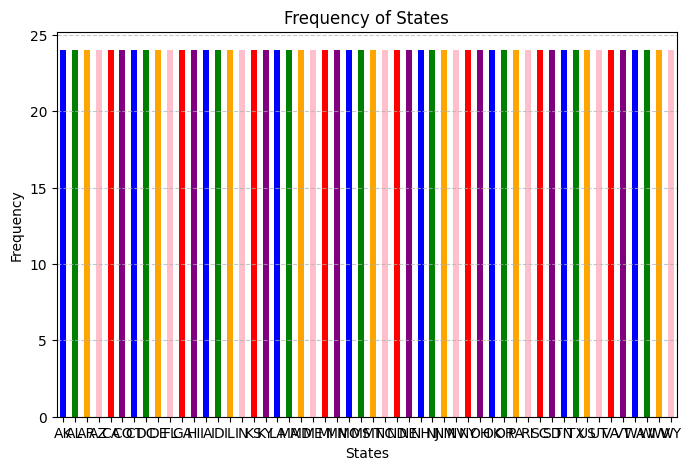

In [ ]:
category_counts1 = newdf['stateId'].value_counts()


# Plot the frequency
plt.figure(figsize=(8, 5))
category_counts1.plot(kind='bar', color=['blue', 'green', 'orange', 'pink', 'red', 'purple'])
plt.xlabel('States')
plt.ylabel('Frequency')
plt.title('Frequency of States')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
category_counts1

,count
stateId,
AK,24
AL,24
AR,24
AZ,24
CA,24
CO,24
CT,24
DC,24
DE,24


In [ ]:
merged_df.head()

,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE
0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906
1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0
2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3
3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21
4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15


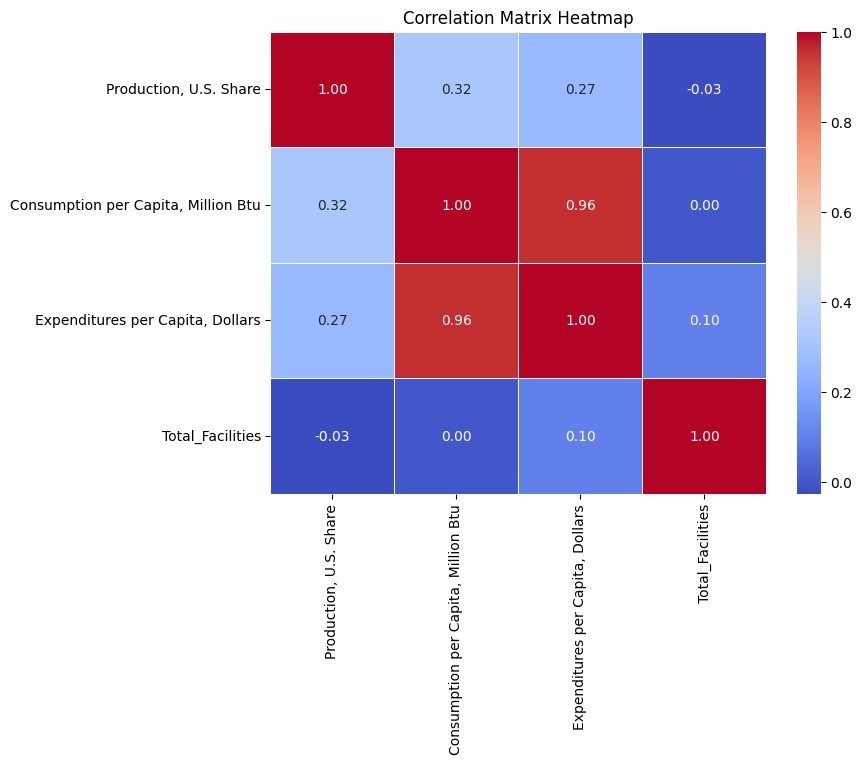

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(merged_df, columns=['Production, U.S. Share', 'Consumption per Capita, Million Btu', 'Expenditures per Capita, Dollars', 'Total_Facilities'])

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
merged_df.head()
merged_df.to_csv('postmerge.csv')

In [ ]:
newdf.head()
newdf.to_csv('postmerge2.csv')

In [ ]:
red_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "Florida", "Georgia", "Idaho", "Indiana", "Iowa","Kansas", "Kentucky", "Louisiana", "Michigan", "Mississippi", "Missouri", "Montana", "Nebraska","Nevada", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Pennsylvania", "South Carolina","South Dakota", "Tennessee", "Texas", "Utah", "West Virginia", "Wisconsin", "Wyoming"]

blue_states = ["California", "Colorado", "Connecticut", "Delaware", "Hawaii", "Illinois", "Maine", "Maryland","Massachusetts", "Minnesota", "New Hampshire", "New Jersey", "New Mexico", "New York", "Oregon","Rhode Island", "Vermont", "Virginia", "Washington", "District of Columbia"]

def label_state(state):
    if state in red_states:
        return 'Red'
    elif state in blue_states:
        return 'Blue'
    else:
        return 'Other'

In [ ]:
dfnew = pd.read_csv('postmerge.csv')
dfnew['Election_2024_Color'] = dfnew['STATE'].apply(label_state)

state_abbrev_to_name = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California','CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia','HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa','KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland','MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri','MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey','NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio','OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island','SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah','VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin','WY': 'Wyoming', 'DC': 'District of Columbia'}

dfnew['State_Full_Name'] = dfnew['STATE'].map(state_abbrev_to_name)

dfnew['Election_2024_Color'] = dfnew['State_Full_Name'].apply(label_state)

dfnew.head()

,Unnamed: 0,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE,Election_2024_Color,State_Full_Name
0,0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906,Red,Alaska
1,1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0,Red,Wyoming
2,2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3,Red,North Dakota
3,3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21,Red,Louisiana
4,4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15,Red,Iowa


In [ ]:
dfnew2 = pd.read_csv('postmerge2.csv')
dfnew2['Election_2024_Color'] = dfnew2['state-name'].apply(label_state)


dfnew2['Election_2024_Color'] = dfnew['State_Full_Name'].apply(label_state)

dfnew2.head()

,Unnamed: 0,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,Election_2024_Color
0,0,2022,CC,Commercial carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red
1,1,2022,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska,Red
2,2,2022,CC,Commercial carbon dioxide emissions,NG,Natural Gas,AK,Alaska,Red
3,3,2022,CC,Commercial carbon dioxide emissions,TO,All Fuels,AK,Alaska,Red
4,4,2022,EC,Electric Power carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red


Frequent Pattern Mining: Apriori

Why the model was chosen (justify selection based on dataset characteristics).

Model assumptions (e.g., SVM assumes data is linearly separable).

Hyperparameter tuning (adjustments to improve model performance).

Challenges faced & solutions (if applicable).




Frequent Pattern Mining: Support, Confidence, Lift

Compare model performances and explain which approach worked best.

Justify why one model performs better than another for their specific dataset.



In [ ]:
dfFP=dfnew2
dfFP.head()

,Unnamed: 0,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,Election_2024_Color
0,0,2022,CC,Commercial carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red
1,1,2022,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska,Red
2,2,2022,CC,Commercial carbon dioxide emissions,NG,Natural Gas,AK,Alaska,Red
3,3,2022,CC,Commercial carbon dioxide emissions,TO,All Fuels,AK,Alaska,Red
4,4,2022,EC,Electric Power carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
transactions = dfFP.groupby('state-name')['fuel-name'].apply(list).tolist()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

frequent_itemsets.head()
rules.head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(All Fuels),(Coal),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(Coal),(All Fuels),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(All Fuels),(Natural Gas),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(Natural Gas),(All Fuels),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(All Fuels),(Petroleum),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules.head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(All Fuels),(Coal),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
1,(Coal),(All Fuels),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
2,(All Fuels),(Natural Gas),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
3,(Natural Gas),(All Fuels),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
4,(All Fuels),(Petroleum),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0


In [ ]:
df = dfFP.drop(dfFP.columns[[0, 1]], axis=1)
df.head()

,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,Election_2024_Color
0,CC,Commercial carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red
1,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska,Red
2,CC,Commercial carbon dioxide emissions,NG,Natural Gas,AK,Alaska,Red
3,CC,Commercial carbon dioxide emissions,TO,All Fuels,AK,Alaska,Red
4,EC,Electric Power carbon dioxide emissions,PE,Petroleum,AK,Alaska,Red


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
df = dfFP.drop(dfFP.columns[[0, 1]], axis=1)

# Group fuel types per state
transactions = df.groupby('state-name')['fuel-name'].apply(list).tolist()

# Transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Run FP-Growth algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
    support                                   itemsets
0       1.0                                (Petroleum)
1       1.0                              (Natural Gas)
2       1.0                                     (Coal)
3       1.0                                (All Fuels)
4       1.0                   (Natural Gas, Petroleum)
5       1.0                          (Coal, Petroleum)
6       1.0                     (All Fuels, Petroleum)
7       1.0                        (Natural Gas, Coal)
8       1.0                   (All Fuels, Natural Gas)
9       1.0                          (All Fuels, Coal)
10      1.0             (Natural Gas, Coal, Petroleum)
11      1.0        (Petroleum, All Fuels, Natural Gas)
12      1.0               (All Fuels, Coal, Petroleum)
13      1.0             (All Fuels, Coal, Natural Gas)
14      1.0  (Petroleum, All Fuels, Coal, Natural Gas)

Association Rules:
                            antecedents                          consequents  \
0

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Classification: SVM

Why the model was chosen (justify selection based on dataset characteristics).

Model assumptions (e.g., SVM assumes data is linearly separable).

Hyperparameter tuning (adjustments to improve model performance).

Challenges faced & solutions (if applicable).

Classification: Accuracy, Precision, Recall, F1-score, ROC-AUC


Compare model performances and explain which approach worked best.


Justify why one model performs better than another for their specific dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dfSVM=dfnew
dfSVM.head()

,Unnamed: 0,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE,Election_2024_Color,State_Full_Name
0,0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906,Red,Alaska
1,1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0,Red,Wyoming
2,2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3,Red,North Dakota
3,3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21,Red,Louisiana
4,4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15,Red,Iowa


In [ ]:
dfSVM['State_Full_Name'] = dfSVM['STATE'].map(state_abbrev_to_name)
dfSVM['Election_2024_Color'] = dfSVM['State_Full_Name'].apply(label_state)

drop_cols = ['Unnamed: 0', 'STATE', 'State_Full_Name', 'Election_2024_Color']
X = dfSVM.drop(columns=drop_cols, errors='ignore').select_dtypes(include=['number'])

le = LabelEncoder()
y = le.fit_transform(dfSVM['Election_2024_Color'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=le.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
report

'              precision    recall  f1-score   support\n\n        Blue       0.75      0.60      0.67         5\n         Red       0.80      0.89      0.84         9\n\n    accuracy                           0.79        14\n   macro avg       0.78      0.74      0.75        14\nweighted avg       0.78      0.79      0.78        14\n'

In [ ]:
conf_matrix

array([[3, 2],
       [1, 8]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=le.transform(['Red'])[0])
recall = recall_score(y_test, y_pred, pos_label=le.transform(['Red'])[0])
f1 = f1_score(y_test, y_pred, pos_label=le.transform(['Red'])[0])

svm_model_proba = SVC(kernel='linear', probability=True)
svm_model_proba.fit(X_train, y_train)
y_proba = svm_model_proba.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

accuracy, precision, recall, f1, roc_auc

(0.7857142857142857,
 0.8,
 0.8888888888888888,
 0.8421052631578947,
 np.float64(0.8222222222222222))

In [ ]:
svm_model2 = SVC(kernel='rbf')
svm_model2.fit(X_train, y_train)

y_pred2 = svm_model2.predict(X_test)
report2 = classification_report(y_test, y_pred2, target_names=le.classes_)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

In [ ]:
report2

'              precision    recall  f1-score   support\n\n        Blue       0.60      0.60      0.60         5\n         Red       0.78      0.78      0.78         9\n\n    accuracy                           0.71        14\n   macro avg       0.69      0.69      0.69        14\nweighted avg       0.71      0.71      0.71        14\n'

In [ ]:
conf_matrix2

array([[3, 2],
       [2, 7]])

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label=le.transform(['Red'])[0])
recall2 = recall_score(y_test, y_pred2, pos_label=le.transform(['Red'])[0])
f12 = f1_score(y_test, y_pred2, pos_label=le.transform(['Red'])[0])

svm_model_probb = SVC(kernel='rbf', probability=True)
svm_model_probb.fit(X_train, y_train)
y_probb = svm_model_probb.predict_proba(X_test)[:, 1]
roc_auc2 = roc_auc_score(y_test, y_probb)

accuracy2, precision2, recall2, f12, roc_auc2

(0.7142857142857143,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 np.float64(0.8))

In [ ]:
svm_model3 = SVC(kernel='poly')
svm_model3.fit(X_train, y_train)

y_pred3 = svm_model3.predict(X_test)
report3 = classification_report(y_test, y_pred3, target_names=le.classes_)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report3

'              precision    recall  f1-score   support\n\n        Blue       0.00      0.00      0.00         5\n         Red       0.64      1.00      0.78         9\n\n    accuracy                           0.64        14\n   macro avg       0.32      0.50      0.39        14\nweighted avg       0.41      0.64      0.50        14\n'

In [ ]:
conf_matrix3

array([[0, 5],
       [0, 9]])

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label=le.transform(['Red'])[0])
recall3 = recall_score(y_test, y_pred3, pos_label=le.transform(['Red'])[0])
f13 = f1_score(y_test, y_pred3, pos_label=le.transform(['Red'])[0])

svm_model_probc = SVC(kernel='poly', probability=True)
svm_model_probc.fit(X_train, y_train)
y_probc = svm_model_probc.predict_proba(X_test)[:, 1]
roc_auc3 = roc_auc_score(y_test, y_probc)

accuracy3, precision3, recall3, f13, roc_auc3

(0.6428571428571429,
 0.6428571428571429,
 1.0,
 0.782608695652174,
 np.float64(0.7777777777777778))

Clustering: DBSCAN


Why the model was chosen (justify selection based on dataset characteristics).

Model assumptions (e.g., SVM assumes data is linearly separable).

Hyperparameter tuning (adjustments to improve model performance).

Challenges faced & solutions (if applicable).

Each team must Select appropriate evaluation metrics based on model type:

Clustering: Silhouette Score, Davies-Bouldin Index

Compare model performances and explain which approach worked best.

Justify why one model performs better than another for their specific dataset.


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
dfDBSCAN=dfnew
dfDBSCAN.head()

,Unnamed: 0,STATE,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Total_Facilities,FAC_TYPE,MODE_BUS,MODE_AIR,MODE_RAIL,MODE_FERRY,MODE_BIKE,BIKE_SHARE,Election_2024_Color,State_Full_Name
0,0,AK,1.4,13,987,1,13051,1,302,5,30,233,26,43,0,906,Red,Alaska
1,1,WY,6.1,4,853,4,11221,2,1,1,0,1,0,0,0,0,Red,Wyoming
2,2,ND,4.2,8,861,3,10507,3,1,1,0,0,1,0,0,3,Red,North Dakota
3,3,LA,4.9,6,925,2,9781,4,7,5,7,2,5,2,0,21,Red,Louisiana
4,4,IA,0.8,19,445,7,6927,5,5,3,4,2,3,0,0,15,Red,Iowa


In [ ]:
dfDBSCAN = dfDBSCAN.drop(columns=['Unnamed: 0', 'STATE'], errors='ignore')
X = dfDBSCAN.select_dtypes(include='number')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
labels = dbscan.fit_predict(X_scaled)

In [ ]:
dfDBSCAN['DBSCAN_Cluster'] = labels

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

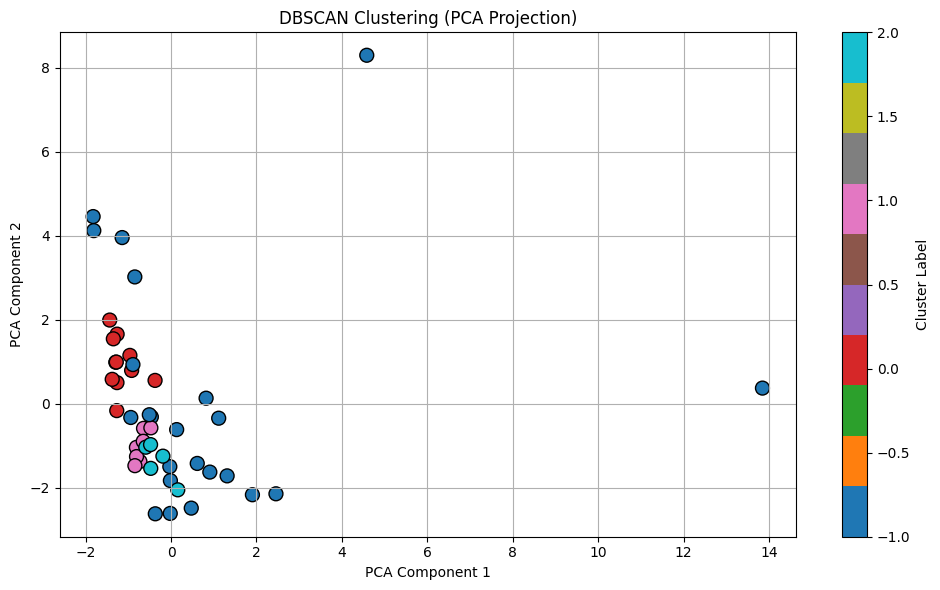

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=100, edgecolor='k')
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dfDBSCAN['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
-1,23
0,11
1,7
2,5


In [ ]:
mask = labels != -1
X_filtered = X_scaled[mask]
labels_filtered = labels[mask]

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
silhouette = silhouette_score(X_filtered, labels_filtered)
davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)

In [ ]:
silhouette

np.float64(0.4309807023475937)

In [ ]:
davies_bouldin

np.float64(0.818314679896487)

Regression: Logistic Regression


Why the model was chosen (justify selection based on dataset characteristics).

Model assumptions (e.g., SVM assumes data is linearly separable).

Hyperparameter tuning (adjustments to improve model performance).

Challenges faced & solutions (if applicable).

Each team must Select appropriate evaluation metrics based on model type:

Regression: RMSE, MSE, R²-score

Compare model performances and explain which approach worked best.

Justify why one model performs better than another for their specific dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, pos_label=le.transform(['Red'])[0])
recall_log = recall_score(y_test, y_pred_log, pos_label=le.transform(['Red'])[0])
f1_log = f1_score(y_test, y_pred_log, pos_label=le.transform(['Red'])[0])
roc_auc_log = roc_auc_score(y_test, y_proba_log)

In [ ]:
accuracy_log, precision_log, recall_log, f1_log, roc_auc_log

(0.6428571428571429,
 0.7,
 0.7777777777777778,
 0.7368421052631579,
 np.float64(0.8222222222222222))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_log)

In [ ]:
rmse, mse, r2

(np.float64(0.5976143046671968), 0.35714285714285715, -0.5555555555555556)

### apriori test


In [ ]:
apdf = merged_df[['Consumption per Capita, Million Btu', 'MODE_BUS', 'MODE_RAIL', 'MODE_FERRY', 'BIKE_SHARE']]
apdf.head()

,"Consumption per Capita, Million Btu",MODE_BUS,MODE_RAIL,MODE_FERRY,BIKE_SHARE
0,987,30,26,43,906
1,853,0,0,0,0
2,861,0,1,0,3
3,925,7,5,2,21
4,445,4,3,0,15


In [ ]:
apdf[transport_cols] = apdf[transport_cols].applymap(lambda x: 1 if x > 0 else 0)
